# Predicting the Weather in your hometown using Prophet

In [1]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

In [19]:
!pip install meteostat -U

## Data Gathering and Preparation
Before getting started, look up the latitude, longitude, and altitude of your town and paste them in the corresponding variables below.

In [66]:
# These sample coordinates are for Bozeman, Montana 
latitude = 45.6770
longitude = 111.0429 # we typically use negative coordinates for the western hemisphere.

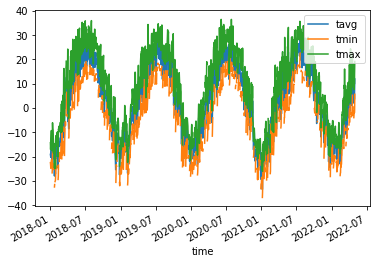

In [67]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Stations

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2022, 5, 1)

# Create Point for Your Hometown
stations = Stations()
stations = stations.nearby(latitude, longitude)
hometown = stations.fetch(1)

# Get daily data for 2018
data = Daily(hometown, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

# Great, the Data is here. What next?
Here are a couple things you and your team should work on. 

*   The temperature in the `'tavg', 'tmin', 'tmax'` columns is in celsius. We need to turn it into Fahrenheit using this equation: (X°C × 9/5) + 32 = Y°F.

*  Our distance measurements for precipitation are in centimeters. Can you make them inches or feet?



In [ ]:
# YOUR CODE HERE FOR CELSIUS TO FAHRENHEIT

In [ ]:
# YOUR CODE HERE FOR DISTANCE CONVERSION

## Making Prophet Happy
Prophet has some specific requirements to be able to fit on our data and create predictions. You can read about them [here](https://facebook.github.io/prophet/docs/quick_start.html).

Mainly, we need a final dataframe with two columns:
 

*   A `pd.datetime` column named "ds" that represents our historical data. 
*   A numerical column named "y" that represents what we are trying to predict.



In [70]:
pd.to_datetime(data.index, unit='s')
data.reset_index(inplace=True)
data.rename(columns={"time":"ds", "tavg": "y"}, inplace = True)

In [71]:
final_df = data[["ds", "y"]]
final_df.head()

,ds,y
0,2018-01-01,-19.1
1,2018-01-02,-19.8
2,2018-01-03,-20.3
3,2018-01-04,-19.2
4,2018-01-05,-17.2


## Running Prophet
Now we are completely set to follow the example at https://facebook.github.io/prophet/docs/quick_start.html. I believe in you!

In [64]:
# Create the Model Object and Fit on final_df using m.fit()

,ds
1629,2022-06-26
1630,2022-06-27
1631,2022-06-28
1632,2022-06-29
1633,2022-06-30


In [ ]:
# Create your future dataframe, try periods = 70 or find a way to predict the weather for the next week.

In [65]:
# Forecast your data with upper and lower bounds using m.predict()

,ds,yhat,yhat_lower,yhat_upper
1629,2022-06-26,21.737237,16.175279,27.723651
1630,2022-06-27,21.614359,15.273942,27.046556
1631,2022-06-28,21.773352,15.966598,27.702998
1632,2022-06-29,21.984475,16.263886,27.831952
1633,2022-06-30,22.195598,16.805486,27.644231


In [ ]:
# Visualize your data using the plot() method.

In [ ]:
# Try using the plot_components method.

In [73]:
from fbprophet.plot import plot_plotly, plot_components_plotly
#Try plotting using plotly